<a href="https://colab.research.google.com/github/Nungdoo/deep-learning-study/blob/main/exercise08_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스로 합성곱 신경망 구현하기

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

'''
  합성곱층 쌓기
  합성곱 커널의 개수 : 10
  합성곱 커널의 크기
  활성화 함수 relu
  세임 패딩 지정
  배치 차원을 제외한 입력의 크기 지정
'''
conv1 = tf.keras.models.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))


'''
  풀링층 쌓기
  풀링의 높이 2, 너비 2
  스트라이드는 기본값으로 풀링의 크기로 지정
  패딩은 기본값으로 valid 지정
'''
conv1.add(MaxPooling2D((2, 2)))

'''
  특성맵 펼치기
  완전 연결층에 연결하기 위해 배치 차원을 제외하고 펼침
'''
conv1.add(Flatten())

# 완전 연결층 쌓기
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

conv1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

- 훈련할 때 전달되는 샘플 개수에 따라 배치 입력 개수가 달라지므로 배치 차원 None
- 모델 파라미터의 개수 = 전체 가중치의 크기와 커널마다 하나씩 절편 추가 (3X3X1X10 + 10 = 100)
- 풀링층과 펼치는 flatten에는 가중치 없음
- 첫 번째 완전연결층에는 14X14X10 = 1,960의 입력이 100개의 뉴런에 전달됨
- 뉴런마다 가중치가 있으므로 첫 번째 완전연결층의 가중치 개수는 196,000 + 100 = 196,100


# 케라스로 합성곱 신경망 모델 훈련하기

In [15]:
# 데이터 세트 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 훈련 세트와 검증 세트로 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

# 타깃을 원-핫 인코딩으로 변환
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 입력 데이터 준비하기 (일렬로 펼칠 필요 없음, 컬러 채널만 추가)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)

# 입력 데이터 표준화 전처리
x_train = x_train / 255
x_val = x_val / 255

(48000, 28, 28, 1)


In [16]:
'''
  최적화 알고리즘으로 아담 옵티마이저 사용
  - Adaptive Moment Estimation 적응적 학습률 알고리즘
  - 손실 함수의 값이 최적값에 가까워질수록 학습률을 낮춰 손실 함수의 값이 안정적으로 수렴될 수 있게 함
  다중 분류를 위한 크로스 엔트로피 손실 함수 사용
  정확도를 관찰하기 위해 accuracy 전달
'''
# 모델 컴파일
conv1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련하기
history = conv1.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.4638 - accuracy: 0.8351 - val_loss: 0.3401 - val_accuracy: 0.8851
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3206 - accuracy: 0.8857 - val_loss: 0.3167 - val_accuracy: 0.8856
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2738 - accuracy: 0.9020 - val_loss: 0.2739 - val_accuracy: 0.9041
Epoch 4/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2421 - accuracy: 0.9113 - val_loss: 0.2597 - val_accuracy: 0.9064
Epoch 5/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2153 - accuracy: 0.9215 - val_loss: 0.2553 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1891 - accuracy: 0.9295 - val_loss: 0.2554 - val_accuracy: 0.9107
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1690 - accuracy: 0.9372 - val_loss: 0.2363 -

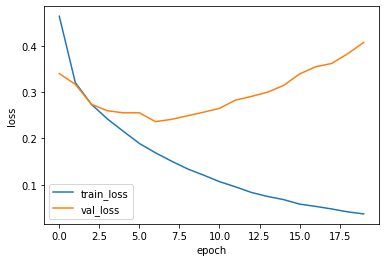

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

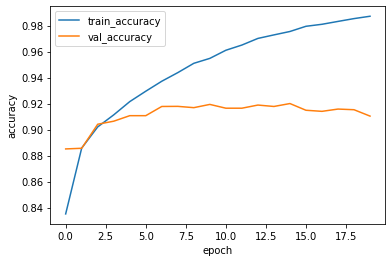

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# 드롭아웃 적용

검증 손실이 크게 증가해버림 > 과대 적합이 발생했음을 의미

**드롭아웃**

- 무작위로 일부 뉴런을 비활성화
- 특정 뉴런에 과도하게 의존하여 훈련하는 것을 방지
- 모델을 훈련시킬 때만 적용하는 기법, 테스트나 실전에는 적용하지 않음
- 상대적으로 훈련 시 출력값이 적어지므로, 텐서플로에서는 훈련 시 드롭아웃 비율만큼 뉴런의 출력을 높여 훈련시킴

In [23]:
# 데이터 세트 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 훈련 세트와 검증 세트로 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

# 타깃을 원-핫 인코딩으로 변환
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

# 입력 데이터 준비하기 (일렬로 펼칠 필요 없음, 컬러 채널만 추가)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
print(x_train.shape)

# 입력 데이터 표준화 전처리
x_train = x_train / 255
x_val = x_val / 255

(48000, 28, 28, 1)


In [24]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.models.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))


# 풀링층 쌓기
conv2.add(MaxPooling2D((2, 2)))

# 특성맵 펼치기
conv2.add(Flatten())

# 드롭아웃 적용
conv2.add(Dropout(0.5))

# 완전 연결층 쌓기
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

conv2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1960)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               196100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

- 드롭아웃 층에도 가중치가 없음
- 단순히 일부 뉴런의 출력을 무작위로 0으로 만들고, 나머지 뉴런의 출력을 드롭되지 않은 비율로 나누어 증가시킴

In [25]:
# 모델 컴파일
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련하기
history = conv2.fit(x_train, y_train_encoded, epochs=20, validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5212 - accuracy: 0.8138 - val_loss: 0.3501 - val_accuracy: 0.8778
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3828 - accuracy: 0.8619 - val_loss: 0.3105 - val_accuracy: 0.8885
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3402 - accuracy: 0.8748 - val_loss: 0.2964 - val_accuracy: 0.8923
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3156 - accuracy: 0.8837 - val_loss: 0.2746 - val_accuracy: 0.8998
Epoch 5/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2935 - accuracy: 0.8910 - val_loss: 0.2638 - val_accuracy: 0.9055
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2753 - accuracy: 0.8992 - val_loss: 0.2526 - val_accuracy: 0.9084
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.2521 -

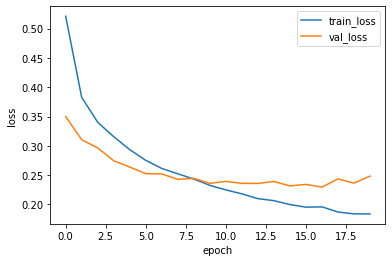

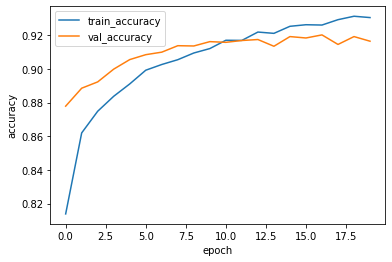

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

검증 손실이 증가하는 에포크가 늦어지고 훈련 손실과의 차이도 줄어듬

정확도도 미세하게 증가함